In [40]:
#Imports
import pandas as pd
from pathlib import Path


In [41]:
#Load crypto data to clean
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto.head()
df_crypto.shape

(1252, 7)

In [42]:
#Filter out crypto currencies that are not traded
df_notTraded = df_crypto[df_crypto.IsTrading == True]
df_notTraded.shape

(1144, 7)

In [43]:
#Drop IsTrading column from clean / filtered data set
df_traded = df_notTraded.drop(columns=["IsTrading"])
df_traded.shape

(1144, 6)

In [44]:
#Drop all NULLS
df_nulls = df_traded.dropna()
df_nulls.shape

(685, 6)

In [45]:
#Drop non essential columns / organize data types
df_nulls.head()
df_cleaned = df_nulls.drop(columns=["CoinName","Unnamed: 0"])
df_cleaned.shape
df_cleaned.TotalCoinSupply = df_cleaned.TotalCoinSupply.astype(float)
df_cleaned.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [46]:
#Create dummy variables for clean/categorized columns
df_dummies = pd.get_dummies(df_cleaned)
df_dummies.shape

(685, 109)

Final cleaned dataset changed to 685 rows and 109 features

In [47]:
#Standardize the data set to control large value influence
#Dimensionality Reduction - Set n_components to preserve 90% of the explained variance

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=.90)

df_dummies_scaled = StandardScaler().fit_transform(df_dummies)

dummies_pca = pca.fit_transform(df_dummies_scaled)

df_dummies_pca = pd.DataFrame(data=dummies_pca)

df_dummies_pca

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-0.226931,1.233286,-0.494639,-3.074211e-07,-2.180976e-10,2.108098e-10,1.021962e-10,-1.002219e-10,0.015015,-1.108822,...,6.615687e-13,-4.332289e-13,-7.912200e-13,-1.754659e-13,-5.280842e-14,5.871498e-13,3.583707e-13,7.472408e-14,7.904338e-13,4.561725e-13
1,-0.212511,1.231877,-0.495250,-3.074212e-07,-2.180975e-10,2.108098e-10,1.021964e-10,-1.002222e-10,0.013635,-1.111887,...,6.613265e-13,-4.340645e-13,-7.912020e-13,-1.748923e-13,-5.312238e-14,5.868439e-13,3.594314e-13,7.460454e-14,7.891817e-13,4.553372e-13
2,-0.156502,0.820326,-0.304937,-2.267267e-07,-1.608530e-10,1.554762e-10,7.537129e-11,-7.391410e-11,-0.001711,-0.625905,...,7.792531e-15,-1.935649e-14,-6.213731e-15,3.019814e-15,6.244676e-15,4.135201e-16,4.908824e-15,-3.361548e-15,3.291779e-15,7.248567e-16
3,0.284201,1.971340,-0.537186,-4.518585e-07,-3.205806e-10,3.098614e-10,1.502117e-10,-1.472873e-10,-0.030183,-0.827578,...,4.932346e-14,-2.279627e-14,-5.241688e-14,1.839631e-14,2.997910e-14,4.604982e-14,6.059332e-14,-1.113407e-14,-5.690006e-14,2.232575e-14
4,-0.208425,-1.471116,0.135380,1.813074e-07,1.286361e-10,-1.243346e-10,-6.027293e-11,5.910834e-11,-0.004237,0.064427,...,8.976690e-15,-1.532681e-14,-8.214744e-15,2.491594e-15,6.021511e-15,4.103819e-15,8.382820e-15,-2.820517e-15,-6.859142e-16,1.683917e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,4.075540,-0.136391,-0.097843,-8.429465e-08,-5.978639e-11,5.777946e-11,2.800451e-11,-2.745945e-11,-1.094977,0.736512,...,7.265293e-15,-1.808396e-14,-7.146047e-15,4.662615e-15,7.084925e-15,1.609729e-15,6.131727e-15,-2.233795e-15,1.687459e-17,-1.334659e-15
681,-0.226727,1.233266,-0.494647,-3.074211e-07,-2.180975e-10,2.108098e-10,1.021964e-10,-1.002221e-10,0.014996,-1.108865,...,6.613781e-13,-4.337000e-13,-7.914579e-13,-1.752115e-13,-5.303080e-14,5.868420e-13,3.594746e-13,7.480133e-14,7.893221e-13,4.553282e-13
682,-0.121196,-2.314110,0.284863,3.476580e-07,2.466611e-10,-2.384098e-10,-1.155739e-10,1.133284e-10,-0.001641,-0.011329,...,5.806607e-14,-1.109223e-13,-1.631028e-14,2.286559e-14,2.212354e-14,-4.422668e-14,-4.144151e-15,3.404714e-14,3.659870e-14,-8.791254e-15
683,-0.277782,-2.030379,0.262191,3.014882e-07,2.139009e-10,-2.067490e-10,-1.002247e-10,9.828546e-11,0.017138,0.161203,...,6.608782e-13,-4.298653e-13,-7.966319e-13,-1.716760e-13,-5.471934e-14,5.935268e-13,3.654135e-13,7.490203e-14,7.839293e-13,4.565011e-13


PCA Reduces Dimensions to 685 Rows and 84 features

In [48]:
#Reduce Dimension further with t-SNE model

from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=30)

tsne_features = tsne.fit_transform(dummies_pca)
tsne_features.shape

(685, 2)

In [49]:
#Create x,y axis for Scatter Plot 
tsne_df = pd.DataFrame(tsne_features, columns=['x','y'])
tsne_df

,x,y
0,-12.598716,8.909170
1,-13.469668,15.941074
2,14.410319,-25.698496
3,-33.004520,7.615308
4,19.351625,-19.294590
...,...,...
680,9.542233,-5.767333
681,-18.222269,11.775264
682,18.323400,24.136414
683,22.850412,-1.676247


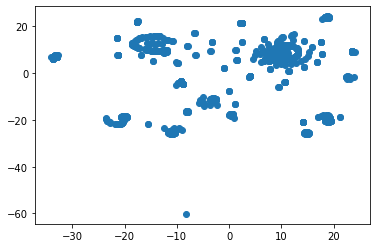

In [50]:
#Create Scatter Plot visual to measure distinct clusters
import matplotlib.pyplot as plt
plt.scatter(tsne_df['x'], tsne_df['y'])
plt.show()

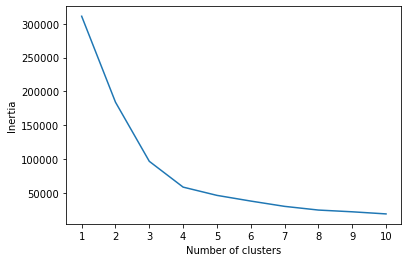

In [51]:
#Create Elbow Plot to identify best number of clusters

import numpy as np
from sklearn.cluster import KMeans

inertia = []
#Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

#For Loop - find the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From observing the Scatter Plot Cluster then measuring the K-Means in our Elbow Plot, we can see the greatest value could found in a grouping model containing 3 to 4 clusters of traded crypto currencies. 